In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# file_name = '/save/qq/400-400'
file_name = './middle_result'
file_id = '1'

class magnet_result_old():
  CACHE_HIT_RATIO = file_name + "/magnet_middle_result_old/cache_hit_ratio/"
  WORKLOAD_BALANCE = file_name + "/magnet_middle_result_old/workload_balance/"
  LATENCY = file_name + "/magnet_middle_result_old/latency/"
  TRAFFIC = file_name + "/magnet_middle_result_old/traffic/"

class magnet_result_622():
  CACHE_HIT_RATIO = file_name + "/magnet_middle_result_622/cache_hit_ratio/"

class magnet_result_622_quick():
  CACHE_HIT_RATIO = file_name + "/magnet_middle_result_622_quick/cache_hit_ratio/"

In [3]:
test_day_beg = 0
test_day_end = 1
test_day = test_day_end - test_day_beg
edge_num = 20
p2_cnt = 48

skip_time = 1

mark_label = ['.', 'x', 'v', '^', '<', '>', 'o', '+']
color_label = ['blue', 'green', 'red', 'cyan', 'yellow', 'black', 'magenta', 'grey']

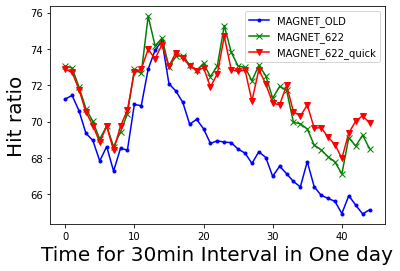

68.64193867601885
71.4230002097377
71.4643982875678


In [4]:
'''画出缓存命中率变化趋势'''
MAGNET_OLD = magnet_result_old.CACHE_HIT_RATIO
MAGNET_622 = magnet_result_622.CACHE_HIT_RATIO
MAGNET_622_quick = magnet_result_622_quick.CACHE_HIT_RATIO

file_name = [MAGNET_OLD, MAGNET_622, MAGNET_622_quick]
model_name = ['MAGNET_OLD', 'MAGNET_622', 'MAGNET_622_quick']
data_num = [0, 0, 0]


for i in range(test_day_beg, test_day_end):
  x = [i for i in range(1, p2_cnt, skip_time)]
  hit_ratio = [[] for i in range(len(model_name))]
  
  for k in range(len(file_name)):
    for j in range(1, p2_cnt, skip_time):
      file_name_now = file_name[k] + str(i*(p2_cnt-1) + j) + ".csv"
      df = pd.read_csv(file_name_now, header=None)
      data = df.iloc[0]
      hit_ratio[k].append(data[data_num[k]])

  # plt.yticks(range(0, 100, 10))
  l_list = []
  for k in range(len(file_name)):
    l, = plt.plot(hit_ratio[k][2:], marker=mark_label[k], color=color_label[k])
    l_list.append(l)
  plt.legend(handles=l_list, labels=model_name, loc='best')
  plt.xlabel("Time for 30min Interval in One day", fontsize=20)
  plt.ylabel("Hit ratio", fontsize=20)
  plt.show()

  for k in range(len(file_name)):
    print(sum(hit_ratio[k][2:]) / len(hit_ratio[k][2:]))